In [1]:
import utils
from utils import *

def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 1,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 50,
            'surrogate_c_interval_min': 0,
           }

## Surrogate

100%|██████████| 1/1 [00:00<00:00, 421.07it/s]

Accuracy: 100.0
Mean episode length: 51.0
Last reward processor:
Estimated confusion matrix:


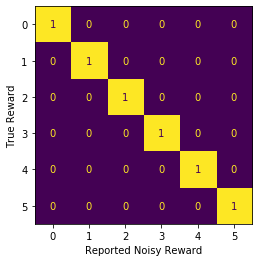

Reward sets:
(0, 0): [-2, -1, -1, 0, -2, -1]
(0, 1): [-1, 0, -1, 0, 0, 0, -1, -1, 0, 0]
(0, 2): [0, 0, -1, -1, -1, -1]
(0, 3): [-3, -3, -2, -3, -1]
(0, 4): [-2, -3, -4, -3, -3, -2]
(0, 5): [-4, -4, -4, -4, -3, -3, -4, -4, -5]
(0, 6): [-5, -5, -5, -3, -4, -3, -4, -5]
Reward set counts:
Key (0, 0): 6 items
Key (0, 1): 10 items
Key (0, 2): 6 items
Key (0, 3): 5 items
Key (0, 4): 6 items
Key (0, 5): 9 items
Key (0, 6): 8 items


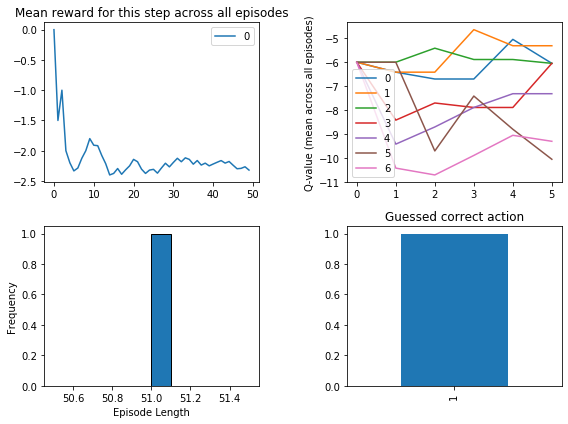

array([ -6.0474,  -5.3131,  -6.0474,  -6.0474,  -7.3131, -10.0474,
        -9.2974])

In [2]:
params_new = {
    'max_steps': 51,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1,
    'convergence_count_start': 1000,    
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 1/1 [00:21<00:00, 21.57s/it]


Accuracy: 100.0
Mean episode length: 10000.0
Last reward processor:
Estimated confusion matrix:


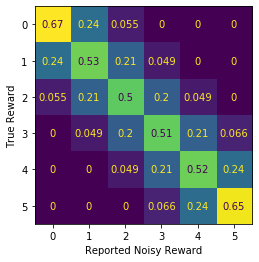

Reward sets:
(0, 0): [-2, -2, 0, 0, -1, 0, -3, -1, -1, -1, -2, -1, -3, -1, -1, -1, -1, -2, -1, -1, -1, -1, -3, -1, -1, -2, -2, -1, -2, -1, -1, -1, -2, -1, -1, 0, -1, -1, -1, -2, -1, -2, -2, 0, -2, -2, -1, -2, -1, -2, -3, -1, -2, -1, -2, -2, -1, 0, -1, 0, -1, 0, -3, -1, -1, -1, 0, -2, -1, -1, -2, -1, -1, -1, 0, -3, -2, -1, -1, -1, -1, -1, -1, 0, -1, -1, -2, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, -1, -2, -2, 0, -2, -1, -1, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1, -2, -2, -2, -2, -1, -1, 0, -2, -1, -3, -1, -1, -1, -1, -1, -2, 0, 0, 0, -1, -1, -1, -2, -1, -1, 0, -1, -2, -2, -1, -2, -1, 0, -1, -1, -1, -1, -2, 0, -2, -1, 0, -1, 0, -2, -1, -2, -1, -1, -1, -1, 0, -1, -1, -2, 0, -1, -1, -1, 0, -1, -1, -1, -3, -1, -1, -2, -1, -2, 0, -1, 0, -2, -1, -1, -3, -3, 0, 0, 0, -2, -1, -2, 0, -1, -2, -1, -1, -2, -1, -1, -1, 0, -1, -1, -3, -2, 0, 0, -1, 0, -2, 0, -1, -1, -2, 0, -1, -1, -1, -1, -2, -1, 0, -1, -1, -1, 0, -2, -1, 0, -2, 0, -2, 0, -1, -1, 0, -2, -2, -1, 0, -1, -2, -1, 0, -1, -2, -1, -1, -

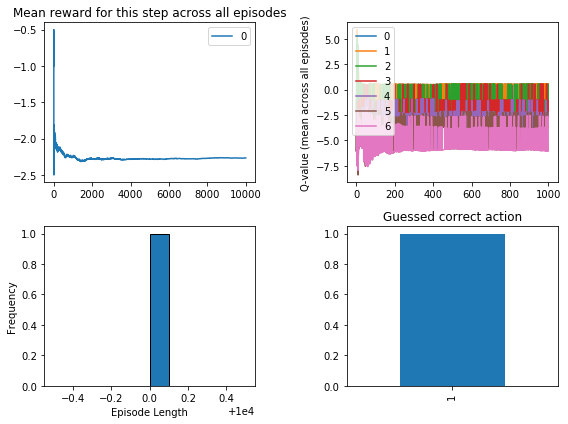

array([-2.2097,  0.5596, -1.045 , -2.6473, -2.6458, -3.6851, -6.0462])

In [10]:
# The rewards are still coming in randomly
# so even though the surrogate tries to conver each to the "true" rewards
# it's still receiving noisy rewards. That confuses the q value

params_new = {
    'max_steps':10000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,
    'stationary_noise': False,   
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Accuracy: 100.0
Mean episode length: 10000.0
Last reward processor:
Estimated confusion matrix:


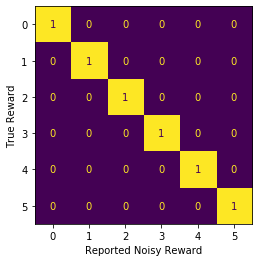

Reward sets:
(0, 0): [-1, 0, -1, -1, -2, -1, -1, -1, 0, -1, -1, -1, -1, -1, -2, -2, 0, -1, -1, -2, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -3, -2, -1, -1, -1, 0, 0, -1, 0, -1, -2, -2, 0, -1, 0, -1, -1, -2, -1, -3, -2, -2, 0, -1, -2, -2, -1, -1, -1, -2, -2, 0, -3, -2, -3, -1, 0, -1, -1, -1, 0, -1, 0, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, 0, -2, -2, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -3, -1, -1, 0, 0, -1, -1, -1, -1, -1, 0, -2, 0, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -2, -1, -1, -1, -1, 0, 0, -1, -1, -3, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, 0, -1, 0, 0, -1, -2, -1, -2, 0, 0, -2, -1, -2, 0, -2, -2, -2, -2, -2, -1, -2, -1, -2, 0, -1, -1, -2, 0, -1, -2, -1, 0, -2, -1, 0, 0, -1, -1, -2, -2, -2, 0, -1, -2, -1, -1, -2, -1, -1, -1, 0, -2, -1, -1, -2, -1, -1, 0, -1, 0, -1, -1, -2, -1, -2, -1, -2, -1, -2, -1, -1, 0, -2, -2, -1, -1, -1, -2, -2, -1, -1, -1, -2, -1, 0, -1, -2, -1, -2, -1, -1, 0, -1, 0, -1, -2, -1, -1, -2, -1, 

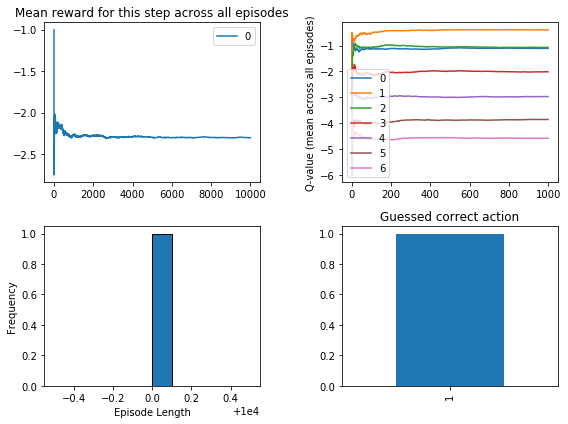

array([-1.1076, -0.3953, -1.0726, -2.0155, -2.9709, -3.8565, -4.5815])

In [11]:
# This changes if we assume stationary noise, and take the mean as the reward.
# But this stationary assumption, with the below parameters, is basically
# Thompson sampling.

params_new = {
    'max_steps':10000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,
    'stationary_noise': True,   
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

In [3]:
# The q value of the correct action (1) will converge to 
# the expected reward, given the true reward is 0
0.67*0 + 0.27*-1 + 0.067*-2

-0.404

In [4]:
# Same for the expected q-value of actions 0 and 2
0.21*0 + 0.53*-1 + 0.21*-2 + 0.053*-3

-1.109

100%|██████████| 1000/1000 [00:02<00:00, 403.42it/s]


Accuracy: 96.89999999999999
Mean episode length: 75.0
Last reward processor:
Estimated confusion matrix:


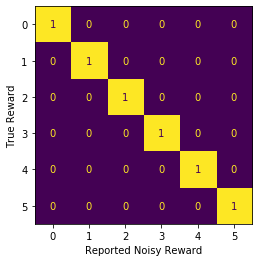

Reward sets:
(0, 0): [0, 0, -2, -1, -1, -2, 0, -1]
(0, 1): [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(0, 2): [-3, -1, -1, -2, -2, -1, -2, -1, -1]
(0, 3): [-3, -3, 0, -3, -2, -2, -2, -4, -3, -2, -1, -2, -1]
(0, 4): [-3, -3, -3, -3, -5, -3, -4, -2, -3, -3, -3, -2, -3]
(0, 5): [-5, -4, -4, -4, -4, -4, -4]
(0, 6): [-4, -5, -5, -5, -5, -4, -5, -5, -5, -5]
Reward set counts:
Key (0, 0): 8 items
Key (0, 1): 14 items
Key (0, 2): 9 items
Key (0, 3): 13 items
Key (0, 4): 13 items
Key (0, 5): 7 items
Key (0, 6): 10 items


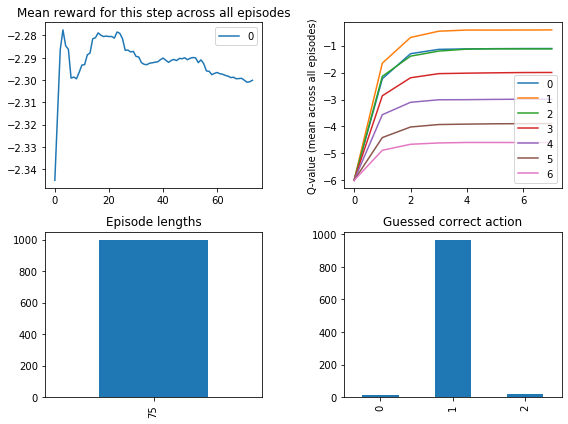

array([-1.1055095, -0.4144291, -1.1181545, -1.9945833, -2.9904736,
       -3.8933675, -4.5952396])

In [24]:
# If our convergence criteria is - highest q value at the end of the episode,
# Then the most perofrmant algorithm seems to be this one, that explores as
# much as possible, and never exploits. Because the exploit is forced onto it
# at the end of the episode. Meaning, a constant epsilon of 1 will performs best
params_new = {
    'max_steps': 75,
    'num_episodes': 1000,
    'plots': True, 
    'noise': True,
    # 'surrogate': False,    
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

Let's see what happens with the accuracy, as we decrease max_steps

In [27]:
params_new = {
    'max_steps': 120,
    'num_episodes': 1000,
    'plots': False, 
    'noise': True,
    # 'surrogate': False,    
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new

for m in range(120, 10, -10):
    params['max_steps'] = m
    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
    print(params['max_steps'], accuracy, np.mean(episode_lengths))

100%|██████████| 1000/1000 [00:03<00:00, 264.69it/s]


120 99.6 120.0


100%|██████████| 1000/1000 [00:03<00:00, 292.49it/s]


110 99.4 110.0


100%|██████████| 1000/1000 [00:03<00:00, 322.30it/s]


100 98.8 100.0


100%|██████████| 1000/1000 [00:02<00:00, 358.98it/s]


90 98.4 90.0


100%|██████████| 1000/1000 [00:02<00:00, 400.13it/s]


80 97.5 80.0


100%|██████████| 1000/1000 [00:02<00:00, 461.31it/s]


70 96.89999999999999 70.0


100%|██████████| 1000/1000 [00:01<00:00, 535.77it/s]


60 95.1 60.0


100%|██████████| 1000/1000 [00:01<00:00, 646.11it/s]


50 92.80000000000001 50.0


100%|██████████| 1000/1000 [00:01<00:00, 803.36it/s]


40 86.5 40.0


100%|██████████| 1000/1000 [00:00<00:00, 1068.20it/s]


30 83.6 30.0


100%|██████████| 1000/1000 [00:00<00:00, 1580.79it/s]

20 70.0 20.0


100%|██████████| 1/1 [00:00<00:00, 577.41it/s]

Accuracy: 0.0
Mean episode length: 20.0
Last reward processor:
Estimated confusion matrix:


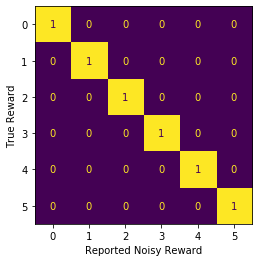

Reward sets:
(0, 0): [-2, 0, 0]
(0, 1): [0, 0, -2]
(0, 2): [0, -2, 0]
(0, 3): [-2]
(0, 4): [-3, -3, -2]
(0, 5): [-3, -4, -4]
(0, 6): [-5, -5, -5]
Reward set counts:
Key (0, 0): 3 items
Key (0, 1): 3 items
Key (0, 2): 3 items
Key (0, 3): 1 items
Key (0, 4): 3 items
Key (0, 5): 3 items
Key (0, 6): 3 items


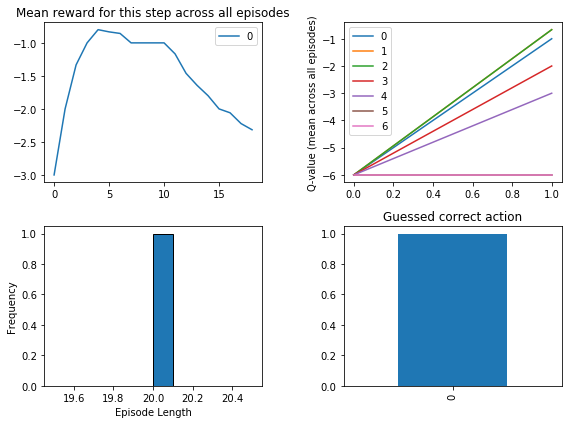

array([-1.    , -0.6667, -0.6667, -2.    , -3.    , -6.    , -6.    ])

In [62]:
params_new = {
    'max_steps': 20,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    # 'surrogate': False,    
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new
plot_mean_q_values(params = params)